In [15]:
!pip install numpy matplotlib pandas tqdm


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
with open("metrics.json", encoding="utf-8") as f:
    data = json.load(f)

In [18]:
pd.set_option('display.max_rows', 500)

df = pd.DataFrame(data)
df.sort_values("duration", ascending=True)

,duration,value,block_size,grid_size,size,runtime,device
106,0.071630,2.666473,1024.0,16384.0,800000000,CUDA Reduction,GPU
96,0.071647,2.666470,512.0,32768.0,800000000,CUDA Reduction,GPU
107,0.071671,2.666472,1024.0,32768.0,800000000,CUDA Reduction,GPU
105,0.071690,2.666468,1024.0,8192.0,800000000,CUDA Reduction,GPU
85,0.071715,2.666481,256.0,32768.0,800000000,CUDA Reduction,GPU
108,0.071723,2.666468,1024.0,65536.0,800000000,CUDA Reduction,GPU
95,0.071770,2.666469,512.0,16384.0,800000000,CUDA Reduction,GPU
97,0.071772,2.666487,512.0,65536.0,800000000,CUDA Reduction,GPU
84,0.071807,2.666470,256.0,16384.0,800000000,CUDA Reduction,GPU
94,0.071808,2.666477,512.0,8192.0,800000000,CUDA Reduction,GPU


In [19]:
runtimes = df["runtime"].unique()
runtimes

array(['OpenCL Reduction', 'C++', 'OpenBLAS', 'clBLASt', 'CUDA Reduction',
       'cuBLAS'], dtype=object)

In [20]:
x = df[df['runtime'] != 'OpenCL Reduction']
x = x[x['runtime'] != 'CUDA Reduction']
x.sort_values("duration", ascending=True)

,duration,value,block_size,grid_size,size,runtime,device
113,0.107483,2.666471,NaN,NaN,800000000,cuBLAS,GPU
56,0.369403,2.532301,NaN,NaN,800000000,OpenBLAS,CPU
57,2.050148,2.666441,NaN,NaN,800000000,clBLASt,NVIDIA GeForce RTX 2060
55,2.085253,0.250000,NaN,NaN,800000000,C++,CPU


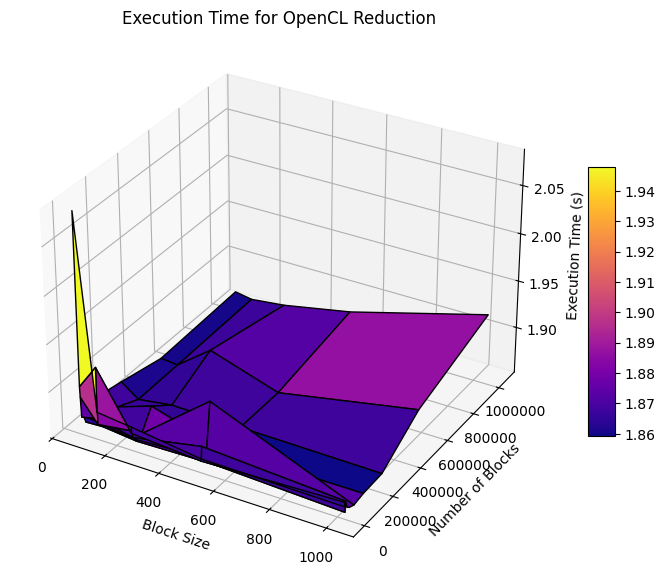

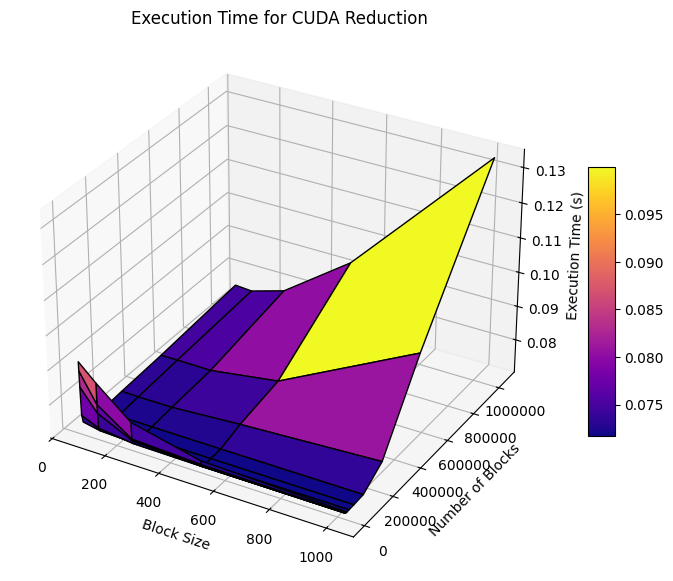

In [21]:


for target_runtime in ['OpenCL Reduction', 'CUDA Reduction']:
    df_filtered = df[df['runtime'] == target_runtime]

    block_sizes = sorted(df_filtered['block_size'].unique())
    counts = sorted(df_filtered['grid_size'].unique())

    X, Y = np.meshgrid(block_sizes, counts)
    Z = np.zeros_like(X, dtype=float)

    for i, count in enumerate(counts):
        for j, block in enumerate(block_sizes):
            match = df_filtered[
                (df_filtered['block_size'] == block) &
                (df_filtered['grid_size'] == count)
            ]
            if not match.empty:
                Z[i, j] = match['duration'].values[0]
            else:
                Z[i, j] = np.nan

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='k')
    ax.ticklabel_format(style='plain')
    ax.set_xlabel('Block Size')
    ax.set_ylabel('Number of Blocks')
    ax.set_zlabel('Execution Time (s)')
    ax.set_title(f'Execution Time for {target_runtime}')
    fig.colorbar(surf, shrink=0.5, aspect=10)

    plt.show()
